In [1]:
# Import Libraries
from numpy import asarray
from numpy import arange
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

In [5]:
# objective function
def objective(x):
    return x[0]**6.0

In [6]:
# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size):
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    solution_eval = objective(solution)
    # run the hill climb
    solutions = list()
    solutions.append(solution)
    for i in range(n_iterations):
        # take a step
        candidate = solution + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidte_eval = objective(candidate)
        # check if we should keep the new point
        if candidte_eval <= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidte_eval
            # keep track of solutions
            solutions.append(solution)
            # report progress
            print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solution, solution_eval, solutions]

>1 f([-2.74290923]) = 425.86173
>3 f([-2.65873147]) = 353.22127
>4 f([-2.52197291]) = 257.30161
>5 f([-2.46450214]) = 224.06561
>7 f([-2.44740961]) = 214.90176
>9 f([-2.28364676]) = 141.83178
>12 f([-2.19245939]) = 111.06810
>14 f([-2.01001538]) = 65.94719
>15 f([-1.86425287]) = 41.97869
>22 f([-1.79913002]) = 33.91371
>24 f([-1.57525573]) = 15.27940
>25 f([-1.55047719]) = 13.89288
>26 f([-1.51783757]) = 12.22790
>27 f([-1.49118756]) = 10.99496
>28 f([-1.45344116]) = 9.42724
>30 f([-1.33055275]) = 5.54872
>32 f([-1.17805016]) = 2.67290
>33 f([-1.15189314]) = 2.33600
>36 f([-1.03852644]) = 1.25460
>37 f([-0.99135322]) = 0.94923
>38 f([-0.79448984]) = 0.25150
>39 f([-0.69837955]) = 0.11602
>42 f([-0.69317313]) = 0.11093
>46 f([-0.61801423]) = 0.05572
>48 f([-0.48799625]) = 0.01351
>50 f([-0.22149135]) = 0.00012
>54 f([-0.20017144]) = 0.00006
>57 f([-0.15994446]) = 0.00002
>60 f([-0.15492485]) = 0.00001
>61 f([-0.03572481]) = 0.00000
>64 f([-0.03051261]) = 0.00000
>66 f([-0.0074283]) = 0.

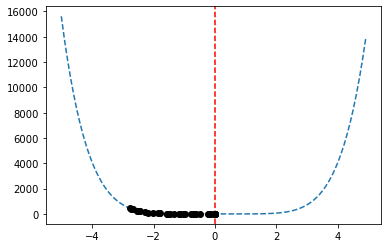

In [7]:
# seed the pseudorandom number generator
seed(5)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# perform the hill climbing search
best, score, solutions = hillclimbing(objective, bounds, n_iterations, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1], 0.1)
# create a line plot of input vs result
pyplot.plot(inputs, [objective([x]) for x in inputs], '--')
# draw a vertical line at the optimal input
pyplot.axvline(x=[0.0], ls='--', color='red')
# plot the sample as black circles
pyplot.plot(solutions, [objective(x) for x in solutions], 'o', color='black')
pyplot.show()